In [1]:
from model.model import *
from processing_pipeline import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [4]:
dfs = pd.concat([preprocess(alldat, i) for i in range(39)])

In [5]:
train, test = train_test_split(dfs)

In [6]:
train.shape

(7814, 21)

In [7]:
set(test["session"])

{1, 4, 8, 12, 19, 22, 25, 30, 35}

In [20]:
df = train

In [29]:
# Define Mode
df['mode'] = 0

# Split Modes
less_25 = df['latency'] < .25
less_50 = df['latency'] <= .5
greater_25 = df['latency'] >= .25

df['mode'][less_25] = 1
df['mode'][less_50 & greater_25] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._up

In [65]:
import seaborn as sns

def create_histogram(df, measure='latency',feedback_type=None,split_fig=None,split_sub=None,split_plot='feedback_type',remove_nogo=True):
    
    # Check to remove no go
    if remove_nogo:
        df = df[df['trial_type'] != "E"]
        
    # Check to remove feedback types
    if feedback_type is not None:
        if feedback_type is -1 or 1:
            df = df[df['feedback_type'] == feedback_type]  
            if feedback_type == -1:
                appended_label = "No Reward Trials Only"
            if feedback_type == 1:
                appended_label = "Reward Trials Only"  
    
    # Pull out all unique figure distinctions 
    if split_fig is not None:
        split_fig_list = sorted(set(df[split_fig]))
    else:
        split_fig_list = ['collapse']
        
    # Pull out all unique subfigure distinctions 
    if split_sub is not None:
        split_sub_list = sorted(set(df[split_sub]))
    else:
        split_sub_list = ['collapse']
    
    # Pull out all unique subplot distinctions 
    if split_plot is not None:
        split_plot_list = sorted(set(df[split_plot]))
    else:
        split_plot_list = ['collapse']
    
    # Plot each figure, subfigure, and plot combination
    for fig_ind,fig in enumerate(split_fig_list):
        plt.figure(fig_ind,figsize=(20,5));
        if fig is not 'collapse':
            df_fig = df[df[split_fig] == fig]
        else:
            df_fig = df
        for sub_ind,sub in enumerate(split_sub_list):
            plt.subplot(np.ceil(np.sqrt(len(split_sub_list))), np.ceil(np.sqrt(len(split_sub_list))), sub_ind+1)
            if sub is not 'collapse':
                df_sub = df_fig[df_fig[split_sub] == sub]
            else:
                df_sub = df_fig
            for plot_ind,plot in enumerate(split_plot_list):
                if plot is not 'collapse':
                    df_plot = df_sub[df_sub[split_plot]==plot]
                else:
                    df_plot = df_sub
                sns.distplot(df_plot[measure], label=split_plot + ' ' + str(plot_ind),norm_hist=True)
                plt.title(str(split_sub) + ' = ' + str(sub))
            plt.legend()
            plt.xlim([0,1.5])
        plt.suptitle(str(fig),fontweight='bold', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

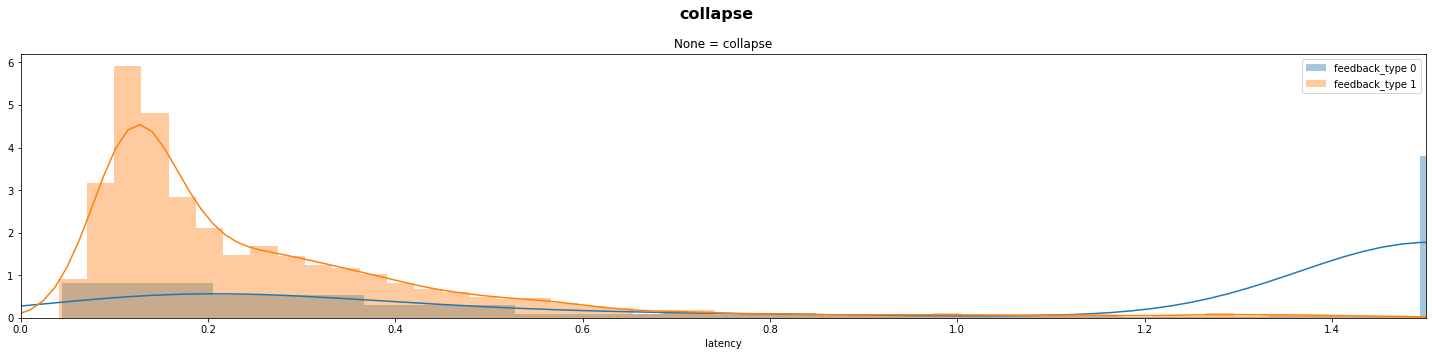

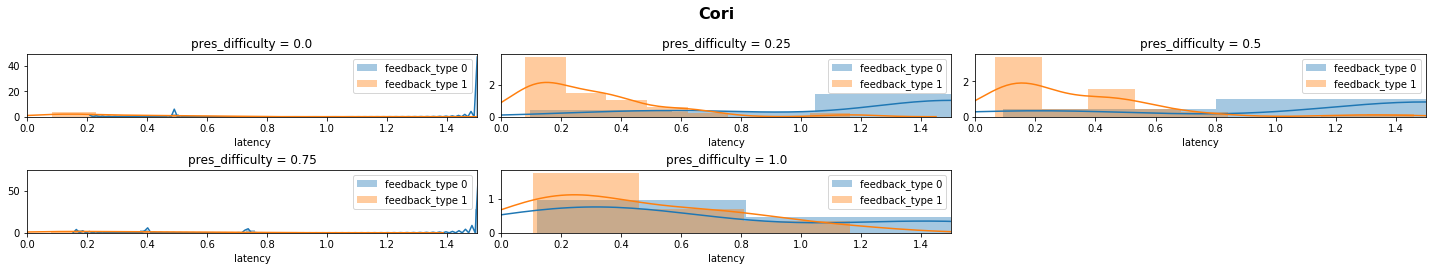

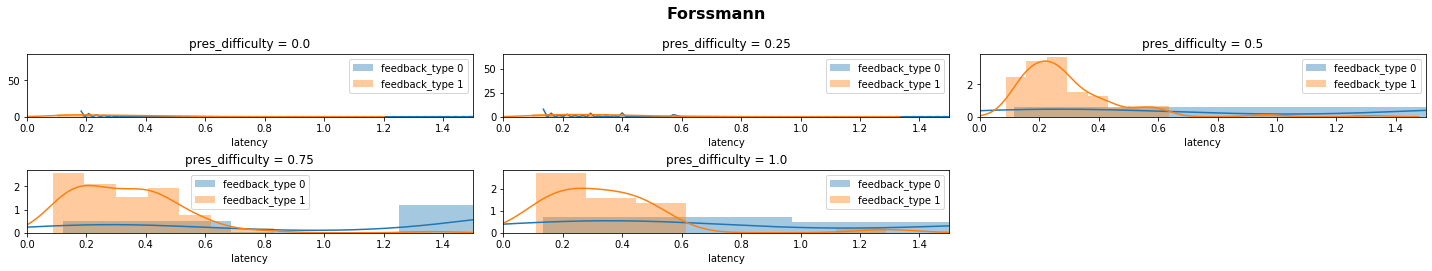

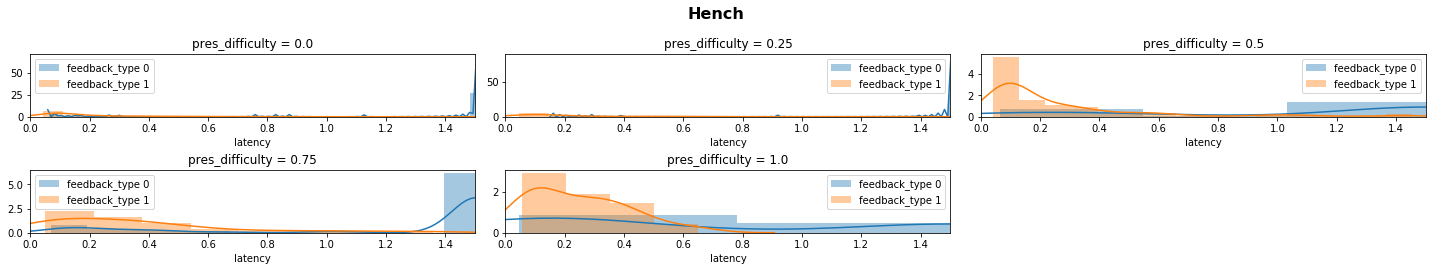

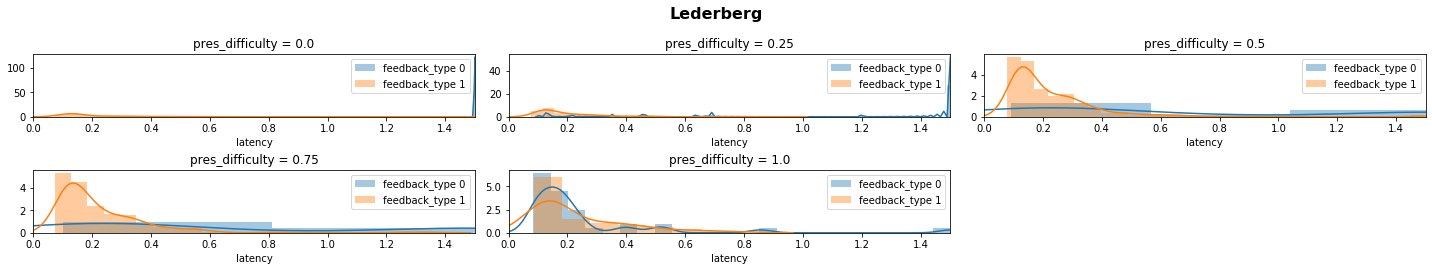

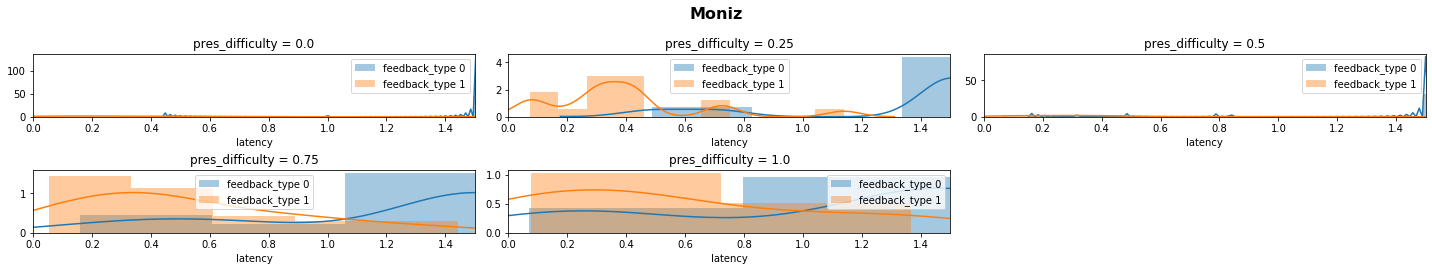

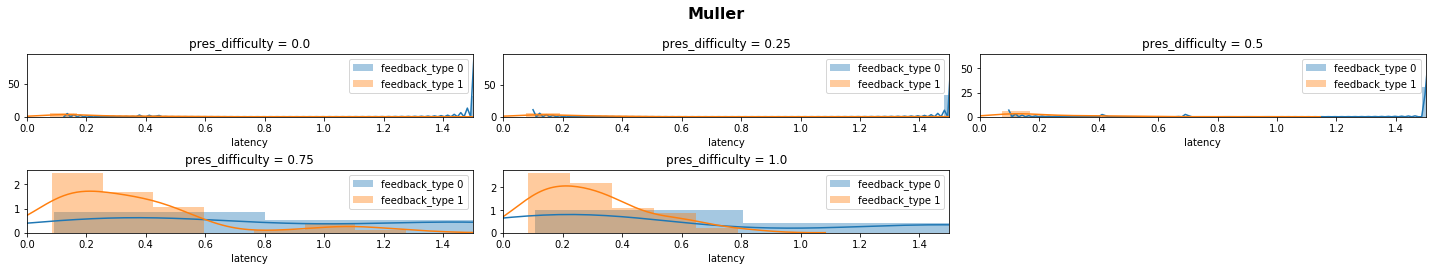

In [ ]:
# Plot latency (with no separations)
create_histogram(df)
create_histogram(df,split_fig='mouse_name',split_sub='pres_difficulty')